<div align="center"><h1>
FYS-STK4155 - Exercises Week 38
</div>
<hr style="border:2px solid gray"> </hr>
<div align="center"><h3>
Håvard Skåli
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

## Derivations:

<!-- We have
$$
\begin{align}
\mathbb{E}\left[(\mathbf{y}-\mathbf{\tilde{y}})^2 \right] &= \mathbb{E}\left[(\mathbf{\tilde{y}}-\mathbf{y})^2 \right]
\\
&= \text{Var}\left[\mathbf{\tilde{y}}-\mathbf{y}\right] + \left(\mathbb{E}\left[\mathbf{\tilde{y}}-\mathbf{y}\right] \right)^2,
\\
&= \text{Var}\left[\mathbf{\tilde{y}}\right] - \text{Var}\left[\mathbf{y}\right] + \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2-2\mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbb{E}\left[\mathbf{y}\right] +\left(\mathbb{E}\left[\mathbf{y}\right]\right)^2,
\\
&= \sigma^2 + \mathbb{E}\left[\mathbf{y}^2 \right] - \text{Var}\left[\mathbf{y}\right] -2\mathbb{E}\left[\mathbf{y}\right]\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \mathbb{E}\left[\mathbf{\tilde{y}}^2 \right] - \text{Var}\left[\mathbf{\tilde{y}}\right],
\\
&= \mathbb{E}\left[\mathbf{y}^2 \right]  -2\mathbb{E}\left[\mathbf{y}\right]\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \mathbb{E}\left[\mathbf{\tilde{y}}^2 \right] - 2\text{Var}\left[\mathbf{\tilde{y}}\right]
\end{align}
$$


$$
\begin{align}
\mathbb{E}\left[(\mathbf{y}-\mathbf{\tilde{y}})^2 \right] &= \mathbb{E}\left[\mathbf{y}^2 - 2\mathbf{y}\cdot\mathbf{\tilde{y}} + \mathbf{\tilde{y}}^2\right]
\\
&= \mathbb{E}\left[\mathbf{y}^2\right] + \mathbb{E}\left[- 2\mathbf{y}\cdot\mathbf{\tilde{y}}\right] + \mathbb{E}\left[\mathbf{\tilde{y}}^2\right],
\\
&= \text{Var}\left[\mathbf{y}\right] + \left(\mathbb{E}\left[\mathbf{y}\right]\right)^2 - 2\Big(\mathbb{E}\left[\mathbf{y}\right]\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \text{Cov}\left[\mathbf{y},\mathbf{\tilde{y}}\right]\Big) + \text{Var}\left[\mathbf{\tilde{y}}\right] + \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2,
\\
&= \text{Var}\left[\mathbf{y}\right] + \left(\mathbb{E}\left[\mathbf{y}\right]\right)^2 - 2\mathbb{E}\left[\mathbf{y}\right]\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \left(\mathbb{E}\left[\mathbf{\tilde{y}} \right]\right)^2 + \text{Var}\left[\mathbf{\tilde{y}}\right] - 2\mathbb{E}\Big[\Big( \mathbf{y} - \mathbb{E}[\mathbf{y}]\Big)\Big( \mathbf{\tilde{y}} - \mathbb{E}[\mathbf{\tilde{y}}]\Big) \Big],
\\
&= \text{Bias}\left[\mathbf{\tilde{y}} \right] + \text{Var}\left[\mathbf{\tilde{y}} \right]
\end{align}
$$


$$
\begin{align}
\mathbb{E}\left[(\mathbf{y}-\mathbf{\tilde{y}})^2 \right] &= \text{Var}\left[\mathbf{y} -\mathbf{\tilde{y}}\right] + \left(\mathbb{E}\left[\mathbf{\mathbf{y}-\tilde{y}}\right] \right)^2,
\\
&= \text{Var}\left[\mathbf{y}\right]-\text{Var}\left[\mathbf{\tilde{y}}\right] + \left(\mathbb{E}\left[\mathbf{y}\right]\right)^2-2\mathbb{E}\left[\mathbf{y}\right]\mathbb{E}\left[\mathbf{\tilde{y}}\right] +\left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2,
\\
&= \sigma^2 + \mathbb{E}\left[\mathbf{y}^2 \right] - \text{Var}\left[\mathbf{y}\right] -2\mathbb{E}\left[\mathbf{y}\right]\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \mathbb{E}\left[\mathbf{\tilde{y}}^2 \right] - \text{Var}\left[\mathbf{\tilde{y}}\right],
\\
&= \mathbb{E}\left[\mathbf{y}^2 \right]  -2\mathbb{E}\left[\mathbf{y}\right]\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \mathbb{E}\left[\mathbf{\tilde{y}}^2 \right] - 2\text{Var}\left[\mathbf{\tilde{y}}\right]
\end{align}
$$



$$
\begin{align}
\text{Bias}\left[\tilde{y}\right] &= \mathbb{E}\left[\left(\mathbf{y}-\mathbb{E}\left[\mathbf{\tilde{y}}\right] \right)^2 \right],
\\
&= \mathbb{E}\left[\mathbf{y}^2\right] - \mathbb{E}\Big[2\mathbf{y}\mathbb{E}\left[\mathbf{\tilde{y}}\right]\Big] + \mathbb{E}\Big[\left(\mathbb{E}[\mathbf{\tilde{y}}] \right)^2 \Big],
\\
&= \sigma^2 + \left(\mathbb{E}\left[\mathbf{y}\right]\right)^2 - 2\mathbb{E}\left[\mathbf{y}\right]\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \left(\mathbb{E}\left[\mathbf{\tilde{y}} \right]\right)^2.
\end{align}
$$


$$
\begin{align}
\text{Var}\left[\tilde{y}\right] &= \mathbb{E}\left[\left(\mathbf{\tilde{y}}-\mathbb{E}\left[\mathbf{\tilde{y}}\right] \right)^2 \right],
\\
&= \mathbb{E}\left[\mathbf{\tilde{y}}^2\right] - \mathbb{E}\Big[2\mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right]\Big] + \mathbb{E}\Big[\left(\mathbb{E}[\mathbf{\tilde{y}}] \right)^2 \Big],
\\
&= \text{Var}\left[\mathbf{y}\right] + \left(\mathbb{E}\left[\mathbf{y}\right]\right)^2 - 2\mathbb{E}\left[\mathbf{y}\right]\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \left(\mathbb{E}\left[\mathbf{\tilde{y}} \right]\right)^2.
\end{align}
$$


$$
\begin{align}
\mathbb{E}\left[(\mathbf{y}-\mathbf{\tilde{y}})^2 \right] &= \mathbb{E}\left[\mathbf{y}^2 -2\mathbf{y}\cdot\mathbf{\tilde{y}} + \mathbf{\tilde{y}}^2\right],
\\
&= \mathbb{E}\left[\mathbf{y}^2\right] - 2\mathbb{E}\left[\mathbf{y}\cdot\mathbf{\tilde{y}}\right] + \mathbb{E}\left[\mathbf{\tilde{y}}^2\right],
\\
&= 
\end{align}
$$ -->
Substituting $\mathbf{y}$ with $f(\mathbf{x}) + \boldsymbol{\epsilon}$, and adding and subtracting $\mathbb{E}\left[\mathbf{\tilde{y}}\right]$, we find that
$$
\begin{align*}
\mathbb{E}\left[(\mathbf{y}-\mathbf{\tilde{y}})^2 \right] 
&= \mathbb{E}\Big[(\underbrace{f(\mathbf{x})}_{\mathbf{f}} + \boldsymbol{\epsilon}-\mathbf{\tilde{y}})^2 \Big],
\\
&= \mathbb{E}\left[(\mathbf{f} + \boldsymbol{\epsilon}-\mathbf{\tilde{y}} + \mathbb{E}\left[\mathbf{\tilde{y}}\right] - \mathbb{E}\left[\mathbf{\tilde{y}}\right])^2\right],
\\
&= \mathbb{E}\Big[\mathbf{f}^2 + \mathbf{f}\boldsymbol{\epsilon} - \mathbf{f}\mathbf{\tilde{y}} + \mathbf{f}\mathbb{E}\left[\mathbf{\tilde{y}}\right] - \mathbf{f}\mathbb{E}\left[\mathbf{\tilde{y}}\right] 
\\
&\hspace{23pt} + \boldsymbol{\epsilon}\mathbf{f} + \boldsymbol{\epsilon}^2 - \boldsymbol{\epsilon}\mathbf{\tilde{y}} + \boldsymbol{\epsilon}\mathbb{E}\left[\mathbf{\tilde{y}}\right] - \boldsymbol{\epsilon}\mathbb{E}\left[\mathbf{\tilde{y}}\right]
\\
&\hspace{23pt} - \mathbf{\tilde{y}}\mathbf{f} - \mathbf{\tilde{y}}\boldsymbol{\epsilon} + \mathbf{\tilde{y}}^2 - \mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right]
\\
&\hspace{23pt} + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{f} + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\boldsymbol{\epsilon} - \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}} + \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2 - \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2
\\
&\hspace{23pt} \left. \:-\: \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{f} - \mathbb{E}\left[\mathbf{\tilde{y}}\right]\boldsymbol{\epsilon} + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}} - \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2 + \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2 \right],
\\
&= \mathbb{E}\Big[\mathbf{f}^2 + \mathbf{f}\boldsymbol{\epsilon} + \boldsymbol{\epsilon}\mathbf{f} + \boldsymbol{\epsilon}^2 - \mathbf{f}\mathbb{E}\left[\mathbf{\tilde{y}}\right] -\boldsymbol{\epsilon}\mathbb{E}\left[\mathbf{\tilde{y}}\right] -\mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{f} -\mathbb{E}\left[\mathbf{\tilde{y}}\right]\boldsymbol{\epsilon}  + \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big]
\\
&\hspace{10pt} + \mathbb{E}\Big[\mathbf{\tilde{y}}^2 - \mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right] - \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}} + \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big]
\\
&\hspace{10pt} +\mathbb{E}\Big[-\mathbf{f}\mathbf{\tilde{y}}- \boldsymbol{\epsilon}\mathbf{\tilde{y}} + \mathbf{f}\mathbb{E}\left[\mathbf{\tilde{y}} \right]+ \boldsymbol{\epsilon}\mathbb{E}\left[\mathbf{\tilde{y}} \right]  - \mathbf{\tilde{y}}\mathbf{f}- \mathbf{\tilde{y}}\boldsymbol{\epsilon} + \mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{f}+ \mathbb{E}\left[\mathbf{\tilde{y}}\right]\boldsymbol{\epsilon} + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}} - 2\left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big].
\end{align*}
$$
Before we move further we may note that the exact function $f(\mathbf{x})$ generally is not known, and we may therefore assume that our data is a good representation and replace $\mathbf{f}$ with $\mathbf{y}$ in the expression above. In practise this $\mathbf{y}$ is then the part of the data set that we have chosen as test set, while the model is made with the remaining data set (the training set). Thus, using that $\mathbb{E}[\mathbb{E}[\mathbf{x}]]= \mathbb{E}[\mathbf{x}]$, $\mathbb{E}[(\mathbb{E}[\mathbf{x}])^2] = (\mathbb{E}[\mathbf{x}])^2$ and $\mathbb{E}[\mathbf{x},\mathbf{y}]=\mathbb{E}[\mathbf{x}]\mathbb{E}[\mathbf{y}]$ for any statistically independent $\mathbf{x}$ and $\mathbf{y}$, and that $\mathbb{E}[\boldsymbol{\epsilon}]=0$ so that we can remove all first order terms in $\boldsymbol{\epsilon}$, we get
$$
\begin{align*}
\mathbb{E}\left[(\mathbf{y}-\mathbf{\tilde{y}})^2 \right] 
&= \mathbb{E}\Big[\mathbf{y}^2 + \boldsymbol{\epsilon}^2 - \mathbf{y}\mathbb{E}\left[\mathbf{\tilde{y}}\right] -\mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{y}  + \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big]
\\
&\hspace{10pt} + \mathbb{E}\Big[\mathbf{\tilde{y}}^2 - \mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right] - \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}} + \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big]
\\
&\hspace{10pt} +\mathbb{E}\Big[-\mathbf{y}\mathbf{\tilde{y}} + \mathbf{y}\mathbb{E}\left[\mathbf{\tilde{y}} \right] - \mathbf{\tilde{y}}\mathbf{y} + \mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right] +\mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{y} + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}} - 2\left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big],
\\
&= \mathbb{E}\Big[\left(\mathbf{y} - \mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big] + \mathbb{E}\big[\boldsymbol{\epsilon}^2\big] + \mathbb{E}\Big[\left(\mathbf{\tilde{y}} - \mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big]
\\
&\hspace{10pt} - \mathbb{E}[\mathbf{y}]\mathbb{E}[\mathbf{\tilde{y}}] + \mathbb{E}[\mathbf{y}]\mathbb{E}[\mathbf{\tilde{y}}] - \mathbb{E}[\mathbf{\tilde{y}}]\mathbb{E}[\mathbf{y}] + \mathbb{E}[\mathbf{\tilde{y}}]\mathbb{E}[\mathbf{\tilde{y}}] + \mathbb{E}[\mathbf{\tilde{y}}]\mathbb{E}[\mathbf{y}] + \mathbb{E}[\mathbf{\tilde{y}}]\mathbb{E}[\mathbf{\tilde{y}}] - 2\left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2,
\\
&= \text{Bias}[\tilde{y}] + \text{Var}[\tilde{y}] + \sigma^2, \tag{1}
\end{align*}
$$
just like we wanted to show.
<!-- &= \mathbb{E}\Big[\underbrace{\mathbf{f}^2 + \mathbf{f}\boldsymbol{\epsilon} + \boldsymbol{\epsilon}\mathbf{f} + \boldsymbol{\epsilon}^2}_{\mathbf{y}^2} - \underbrace{\left(\mathbf{f} +\boldsymbol{\epsilon} \right)}_\mathbf{y}\mathbb{E}\left[\mathbf{\tilde{y}}\right] -\mathbb{E}\left[\mathbf{\tilde{y}}\right]\underbrace{\left(\mathbf{f} +\boldsymbol{\epsilon} \right)}_\mathbf{y} + \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big]
\\
&\hspace{10pt} + \mathbb{E}\Big[\mathbf{\tilde{y}}^2 - \mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right] - \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}} + \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big]
\\
&\hspace{10pt} +\mathbb{E}\Big[-\left(\mathbf{f}+ \boldsymbol{\epsilon}\right)\mathbf{\tilde{y}} + \left(\mathbf{f}+ \boldsymbol{\epsilon}\right)\mathbb{E}\left[\mathbf{\tilde{y}} \right]  - \mathbf{\tilde{y}}\left(\mathbf{f}+ \boldsymbol{\epsilon}\right) + \mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\left(\mathbf{f}+ \boldsymbol{\epsilon}\right) + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}} - 2\left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big],
\\
&= \mathbb{E}\Big[\left(\mathbf{y} - \mathbb{E}\left[\mathbf{\tilde{y}}\right] \right)^2\Big] + \mathbb{E}\Big[\left(\mathbf{\tilde{y}} - \mathbb{E}\left[\mathbf{\tilde{y}}\right] \right)^2\Big] 
+ \mathbb{E}\Big[-\mathbf{y}\mathbf{\tilde{y}} + \mathbf{y}\mathbb{E}\left[\mathbf{\tilde{y}} \right]  - \mathbf{\tilde{y}}\mathbf{y} + \mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{y} + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}} - 2\left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big] -->


<!-- $$
\begin{align*}
&\:\mathbb{E}\Big[-\mathbf{y}\mathbf{\tilde{y}} + \mathbf{y}\mathbb{E}\left[\mathbf{\tilde{y}} \right]  - \mathbf{\tilde{y}}\mathbf{y} + \mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{y} + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}} - 2\left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big]
\\ 
=&\: -\mathbb{E}\left[\mathbf{y}\mathbf{\tilde{y}}\right] + \mathbb{E}\big[\mathbf{y}\mathbb{E}\left[\mathbf{\tilde{y}}\right]\big] -\mathbb{E}\left[\mathbf{\tilde{y}}\mathbf{y}\right] + \mathbb{E}\big[\mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right]\big] + \mathbb{E}\big[\mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{y}\big] + \mathbb{E}\big[\mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}}\big] -2\mathbb{E}\Big[\left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big],
\\
=&\: -2 \mathbb{E}\big[\mathbf{y}\big]\mathbb{E}\big[\mathbf{\tilde{y}}\big] + 2\mathbb{E}\big[\mathbf{y}\big]\mathbb{E}\big[\mathbf{\tilde{y}}\big] + 2\mathbb{E}\big[\mathbf{\tilde{y}}\big]\mathbb{E}\big[\mathbf{\tilde{y}}\big] -2\left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2
\end{align*}
$$ -->


## Interpretation:

The model bias represents the model's systematic errors, which could be caused by the choice of training data, the simplifying assumptions and choice of features used to build the model, and/or the algorithm used to train the model. The variance of the model represents instead the error due to its sensitivity to small fluctuations in the training set. The last term represents the variance of the noise in the true data set $\mathbf{y}$, which is the random variation in the data that cannot be explained by the model. It is inherent in the data and contributes to the model's overall error ($MSE$). 

A high bias is typically the consequence of underfitting, i.e. low complexity, because the model is too simple and cannot capture the patterns in the data accurately. As a result, both training and test set performances are poor. On the other hand, a high variance generally results from overfitting, i.e. large complexity. This occurs because the model learns the noise of the training data and fits to it, which makes the model fit worse to the test set since the noise in the true data set is random. In other words, bias decreases as model complexity increases because the model becomes more flexible and better fits the training data. However, variance increases because the model becomes more sensitive to small fluctuations or noise in the data. The goal is to find an optimal balance between bias and variance, hence the name bias-variance tradeoff, where the model is complex enough to capture the underlying patterns without overfitting to the noise in the training data. It is important to note that no matter how much we minimize the bias and variance of the model we cannot reduce the variance due to noise in the data, hence there is a limit to how much the model can reduce the total $MSE$.

## Bias-Variance Analysis:

Error: 0.04294469053303823
Bias:  0.040216444776939045
Var:   0.0027282457560991948
0.04294469053303823 >= 0.040216444776939045 + 0.0027282457560991948 = 0.04294469053303824


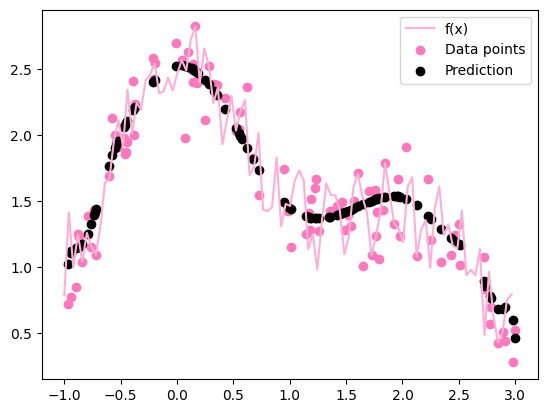

In [13]:
np.random.seed(299)

n = 500
n_boostraps = 100
degree = 18         # A quite high value, just to show.
noise = 0.2

# Make data set.
x = np.linspace(-1, 3, n).reshape(-1, 1)
y = 2.5 * np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, noise, x.shape)

# Hold out some test data that is never used in training.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Combine x transformation and model into one operation
model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))

# The following (m x n_bootstraps) matrix holds the column vectors y_pred for each bootstrap iteration.
y_pred = np.empty((y_test.shape[0], n_boostraps))
for i in range(n_boostraps):
    x_, y_ = resample(x_train, y_train)

    # Evaluate the new model on the same test data each time.
    y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

# Note 1: Expectations and variances taken w.r.t. different training data sets, hence the axis=1. 
# Subsequent means are taken across the test data set in order to obtain a total value, but before 
# this we have error/bias/variance calculated per data point in the test set.
# Note 2: The use of keepdims=True is important in the calculation of bias as this maintains the column vector form. 
error = np.mean(np.mean((y_test - y_pred)**2, axis=1, keepdims=True))
bias = np.mean((y_test - np.mean(y_pred, axis=1, keepdims=True))**2)
variance = np.mean(np.var(y_pred, axis=1, keepdims=True))
print('Error:', error)
print('Bias: ', bias)
print('Var:  ', variance)
print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))

plt.plot(x[::5, :], y[::5, :], label='f(x)', color = "#ffaed7")
plt.scatter(x_test, y_test, label='Data points', color = "#ff77bc")
plt.scatter(x_test, np.mean(y_pred, axis=1), label='Prediction', color = "k")
plt.legend()
plt.show()

In [ ]:
#TODO double check and explain the connection that error, bias variance, y_test and y_pred have with derivations above
#TODO plot MSE value as function of the complexity (degree)
#TODO plot MSE value as function of number of data points
#TODO plot MSE value as function of number of bootstrap steps ?
#TODO plot MSE value as function of test data portion size ?

## Discussion:

In [ ]:
#TODO discuss the bias and variance trade-off as function of model complexity (the degree of the polynomial) and the number of data points, 
#TODO possibly discuss how changing the training and test data portions affect bias and variance trade-off ?
#TODO check and discuss how the number of bootstrap steps affect the bias and variance trade-off ?